In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy.signal import convolve2d as conv
%matplotlib inline

In [2]:
def Lectura(imgPath): #Función para leer la imagen
    img = cv.imread(imgPath)
    return img

def mostrar(img): #Función para mostrar las imágenes
    cv.imshow('Imagen', img)
    k = cv.waitKey(0)
    if k == ord("s"):
        cv.imwrite("Imagen.png", img)
    cv.destroyAllWindows() 

In [30]:
imgPath = '3.jpeg'
mostrar(Lectura(imgPath))

# Procesamiento de imágenes (métodos)

Cambiar espacios de colores

In [31]:
def grises(img): #Función para convertir la imágen a escala de grises
    img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_gris_double = img_gris / np.max(img_gris)    
    return [img_gris, img_gris_double]

In [32]:
mostrar(grises(Lectura(imgPath))[0])

Umbrales de la imagen

Umbral simple

In [6]:
def umbrales(img_g): #Función para defini un umbral simple (5 maneras de hacerlo)
    ret,Binario = cv.threshold(img_g,127,255,cv.THRESH_BINARY)
    ret,Binario_inv = cv.threshold(img_g,127,255,cv.THRESH_BINARY_INV)
    ret,Truncado = cv.threshold(img_g,127,255,cv.THRESH_TRUNC)
    ret,T_0 = cv.threshold(img_g,127,255,cv.THRESH_TOZERO)
    ret,T_0_inv = cv.threshold(img_g,127,255,cv.THRESH_TOZERO_INV)
    return [Binario, Binario_inv, Truncado, T_0, T_0_inv]

In [33]:
mostrar(umbrales(grises(Lectura(imgPath))[0])[0])
mostrar(umbrales(grises(Lectura(imgPath))[0])[1])
mostrar(umbrales(grises(Lectura(imgPath))[0])[2])
mostrar(umbrales(grises(Lectura(imgPath))[0])[3]) #Me gustó más el cambio en la imagen 3
mostrar(umbrales(grises(Lectura(imgPath))[0])[4])

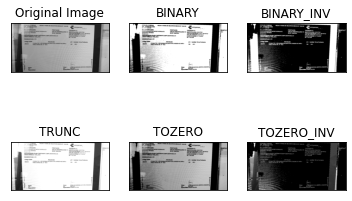

In [8]:
img = cv.imread(imgPath,0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

Umbral adaptado

In [9]:
def umbral_adap(img_g):
    imag = cv.medianBlur(img_g,5)
    ret,Binario = cv.threshold(imag,127,255,cv.THRESH_BINARY)
    Media = cv.adaptiveThreshold(imag,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
    Gauss = cv.adaptiveThreshold(imag,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
    return [ imag, Binario, Media, Gauss]

In [34]:
mostrar(umbral_adap(grises(Lectura(imgPath))[0])[0]) #No entiendo por qué se ve tan borrosa la original!!!
mostrar(umbral_adap(grises(Lectura(imgPath))[0])[1])
mostrar(umbral_adap(grises(Lectura(imgPath))[0])[2])
mostrar(umbral_adap(grises(Lectura(imgPath))[0])[3])

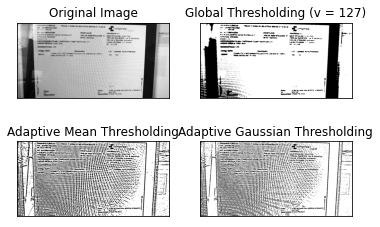

In [11]:
img = cv.imread('3.jpeg',0)
img = cv.medianBlur(img,5)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Binarización Otsu

In [12]:
def umbral_Otsu(img_g):
    ret1,Binario = cv.threshold(img_g,127,255,cv.THRESH_BINARY) # global thresholding
    ret2,Otsu = cv.threshold(img_g,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) # Otsu's thresholding
    blur = cv.GaussianBlur(img_g,(5,5),0) #Gaussian filtering
    ret3,Otsu_filt_Gaus = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) # Otsu's thresholding after Gaussian filtering
    return [Binario, Otsu, Otsu_filt_Gaus]

In [35]:
mostrar(umbral_Otsu(grises(Lectura(imgPath))[0])[0])
mostrar(umbral_Otsu(grises(Lectura(imgPath))[0])[1])
mostrar(umbral_Otsu(grises(Lectura(imgPath))[0])[2])

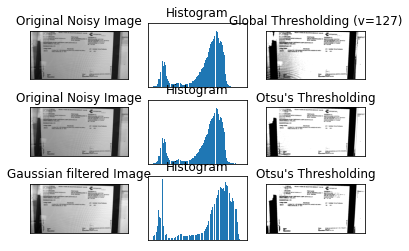

In [14]:
img = cv.imread('3.jpeg',0)

# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

Transformaciones geométricas

Reducción tamaño

In [15]:
def red_t(img_g): 
    rows,cols = img_g.shape
    M = np.float32([[1,0,0.5],[0,1,0.5]])
    dst = cv.warpAffine(img_g,M,(cols,rows))
    return dst

In [ ]:
mostrar(red_t(grises(Lectura(imgPath))[0]))#No entiendo cómo reducir o ampliar tamaño

Rotación

In [17]:
def rotacion(Img_g): 
    rows,cols = Img_g.shape
    M = cv.getRotationMatrix2D((cols/2,rows/2),90,1)
    dst = cv.warpAffine(Img_g,M,(cols,rows))
    return dst

In [18]:
mostrar(rotacion(grises(Lectura(imgPath))[0])) #Trabajar en la imagen para que se vea completo

Transformación de perspectiva

In [24]:
def persp(img): 
    rows,cols,ch = img.shape
    pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
    pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
    M = cv.getPerspectiveTransform(pts1,pts2)
    dst = cv.warpPerspective(img,M,(300,300))
    return dst

In [29]:
persp(Lectura(imgPath)[0]) #Revisar el error

ValueError: not enough values to unpack (expected 3, got 2)

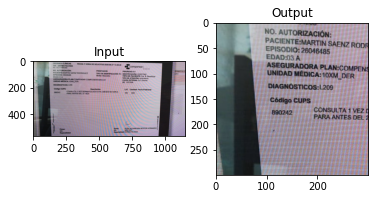

In [23]:
img = cv.imread('3.jpeg')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv.getPerspectiveTransform(pts1,pts2)

dst = cv.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()


Suavización de imágenes